## Dependencias

In [1]:
from sklearn.datasets import load_wine
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importar datos  

In [2]:
data = load_wine(as_frame=True)
data = data.frame

In [3]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Visualización

In [5]:
data.keys()

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

<Axes: xlabel='nonflavanoid_phenols', ylabel='Count'>

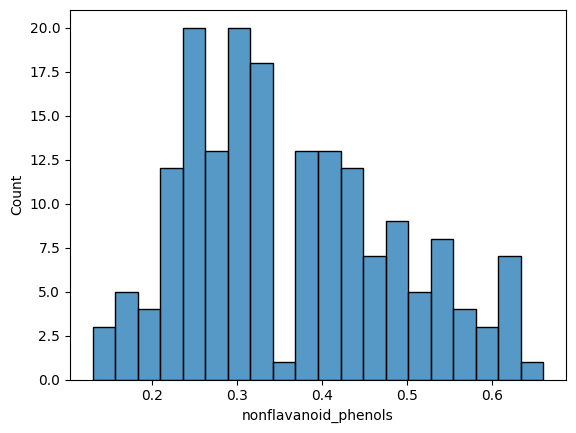

In [6]:
sns.histplot(data=data, x='nonflavanoid_phenols', bins=20)

## Teorema central del limite

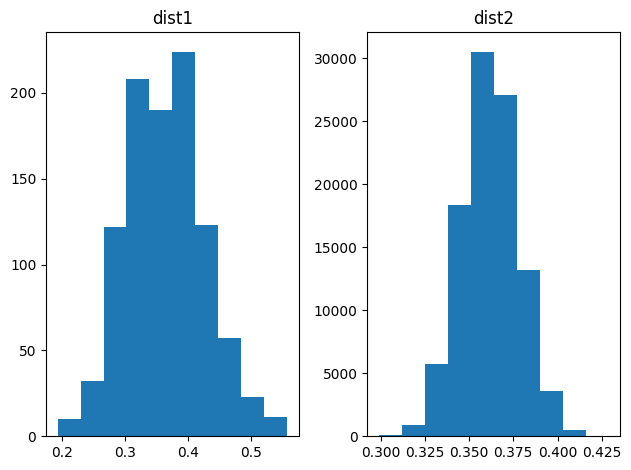

In [7]:
dist1 = []
for x in range (0, 1000):
    dist1.append(data['nonflavanoid_phenols'].sample(n=4, replace=True).mean())

dist2 = []
for x in range (0, 100000):
    dist2.append(data['nonflavanoid_phenols'].sample(n=60, replace=True).mean())

fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)

axs[0].hist(dist1)
axs[0].title.set_text('dist1')
axs[1].hist(dist2)
axs[1].title.set_text('dist2')

plt.show()

## Selección aleatoria de datos

In [8]:
random_choice = np.random.choice(data['nonflavanoid_phenols'], size=int(data['nonflavanoid_phenols'].shape[0]*0.4), replace=True)

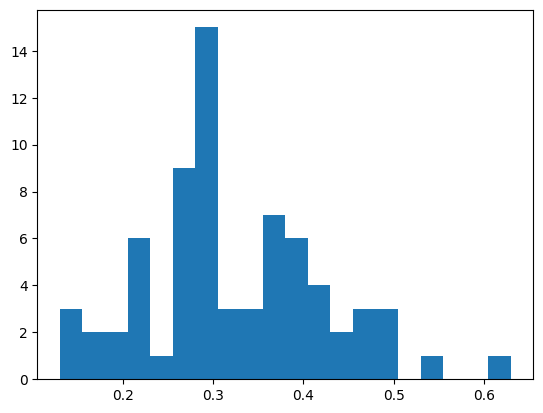

In [9]:
plt.hist(random_choice, bins=20)
plt.show()

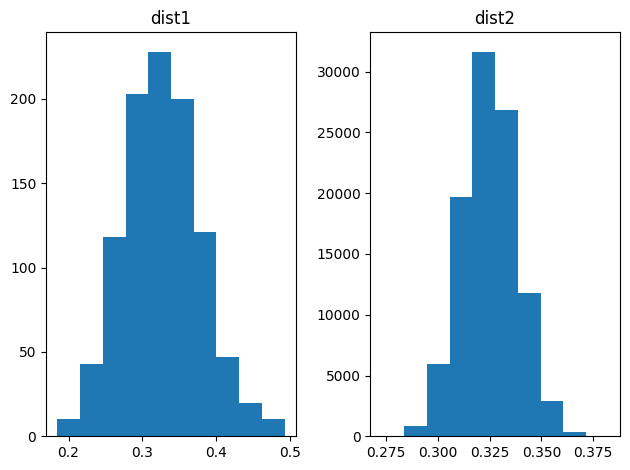

In [10]:
dist1 = []
for x in range (0, 1000):
    dist1.append(np.random.choice(random_choice, 4,replace=True).mean())

dist2 = []
for x in range (0, 100000):
    dist2.append(np.random.choice(random_choice, 60,replace=True).mean())

fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)

axs[0].hist(dist1)
axs[0].title.set_text('dist1')
axs[1].hist(dist2)
axs[1].title.set_text('dist2')

plt.show()

## Ley de los grandes numeros

In [18]:
n, p = 1, .5  # Values, probability of each trial
n_lanzamientos = 10000

In [19]:
resultados = np.random.binomial(n, p, n_lanzamientos)

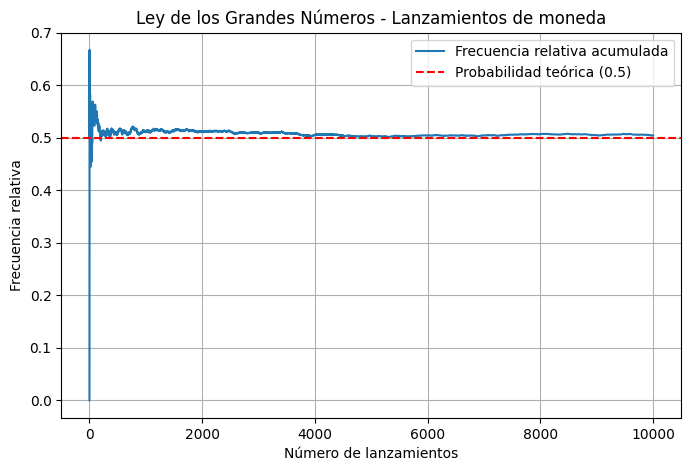

In [20]:
# Frecuencia relativa acumulada
frecuencia_acumulada = np.cumsum(resultados) / np.arange(1, n_lanzamientos + 1)

# Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(frecuencia_acumulada, label="Frecuencia relativa acumulada")
plt.axhline(y=p, color='r', linestyle='--', label='Probabilidad teórica (0.5)')
plt.title('Ley de los Grandes Números - Lanzamientos de moneda')
plt.xlabel('Número de lanzamientos')
plt.ylabel('Frecuencia relativa')
plt.legend()
plt.grid(True)
plt.show()